## Знакомство с библиотеками для анализа данных. Pandas

Результат лабораторной работы − отчет в формате ноутбука Jupyter (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам —  проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### О задании

Лабораторные работы "NumPy" и "Pandas" направлены на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач (да, алгебры и геометрии тут почти нет). В данных заданиях разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью заданий является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в заданиях функции.


### Оценивание и штрафы

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи)
* «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов
* Если вы нашли решение какого-то из заданий в открытом источнике, необходимо добавить ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник)
* Не оцениваются задания с удалёнными формулировками
* Не оценивается лабораторная работа целиком, если она была выложена в открытый источник

### Аналитика данных с [Pandas](https://pandas.pydata.org/) 

Загрузите таблицу с данными из [```articles.csv```](https://disk.yandex.ru/i/m4rxX9t3MGMrnQ). Удалите записи, в которых присутствуют пропуски.

**(0.5 балла) Задача 1.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv('Downloads/articles.csv')
df.replace("", np.nan, inplace = True)
df.dropna(inplace = True)

print ('-'*10, 'Задание 1. Пункт 1:', '-'*10)
print ('Количество различных издательств:', df.publication.nunique(), '\n')

print ('-'*10, 'Задание 1. Пункт 2:', '-'*10)
out = ((df['date'] >= '2016-06-01') & (df['date'] <= '2016-12-31'))
print ('Kоличество опубликованных статей в заданном промежутке:', df.loc[out].shape[0], '\n')

print ('-'*10, 'Задание 1. Пункт 3:', '-'*10)
out = df.loc[df['author'] == 'Tom Ciccotta'].groupby(df.year).agg({'count'})['id']
print ('распределение статей автора по годам:\n', out, '\n')

print ('-'*10, 'Задание 1. Пункт 4:', '-'*10)
out = (df.groupby(df.month).agg({'count'}))
out = out['id'].sort_values(['count'], ascending=[False])
print ('Месяц, в котором вышлоло наибольшее число статей:\n', out.head(1), '\n')

print ('-'*10, 'Задание 1. Пункт 5:', '-'*10)
out = df[(df['author'] == 'John Hayward') & (df['year'] == 2016)].sort_values(['date'], ascending=[True])
print ('Первые три статьи автора John Hayward в 2016 году:\n', out.head(3)['title'], '\n')

---------- Задание 1. Пункт 1: ----------
Количество различных издательств: 5 

---------- Задание 1. Пункт 2: ----------
Kоличество опубликованных статей в заданном промежутке: 17159 

---------- Задание 1. Пункт 3: ----------
распределение статей автора по годам:
       count
year       
2016    124
2017    132 

---------- Задание 1. Пункт 4: ----------
Месяц, в котором вышлоло наибольшее число статей:
        count
month       
1       5235 

---------- Задание 1. Пункт 5: ----------
Первые три статьи автора John Hayward в 2016 году:
 16861    Indonesian Couple Beaten with Canes for Violat...
22041    Islamic State Claims Credit For Gun Attack On ...
27561    Protests Across India Against Saudi Execution ...
Name: title, dtype: object 



** Работа со строками в датафрейме. **

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 2.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [8]:
all_count = df[df['author'].str.contains('Faith')]['author']
uniq_count = all_count.unique()
print (uniq_count)

[' Faith Haleh Robinson' 'Faith Karimi' 'Faith Haleh Robinson'
 'Faith Karimi,' 'Faith Karimi ' 'Faith Karimi, ' ' Faith Karimi'
 ' Faith Karimi ']


**(1 балл) Задача 3. **

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 4.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [164]:
df_sort = df.groupby(['author','year'])[['publication']].count().loc[df.groupby(['author','year'])[['publication']].count().groupby('author')['publication'].idxmax()]
df_sort = df_sort.sort_values(['publication'], ascending=[False]).head(20)
print(df_sort)

                          publication
author              year             
Breitbart News      2016         1317
Pam Key             2016          820
Charlie Spiering    2016          660
Alex Swoyer         2016          584
Daniel Nussbaum     2016          532
AWR Hawkins         2016          525
John Hayward        2016          521
Jerome Hudson       2016          482
Ian Hanchett        2016          429
Joel B. Pollak      2016          417
Jeff Poor           2016          323
Warner Todd Huston  2016          316
Trent Baker         2016          280
Patrick Howley      2016          259
Breitbart London    2016          258
Frances Martel      2016          257
Charlie Nash        2016          254
Katherine Rodriguez 2017          231
Ben Kew             2016          221
Aaron Klein         2016          209


**(1 балл) Задача 5.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

*Hint*. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [193]:
sort = df.groupby(['publication', 'date'])['id'].count().reset_index(name="count")
pd.merge(df, sort)


,id,title,publication,author,date,year,month,content,count
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016,12,WASHINGTON — Congressional Republicans have...,4
1,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016,12,"Just how is Hillary Kerr, the founder of ...",4
2,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016,12,Angels are everywhere in the Muñiz family’s ap...,4
3,24819,"Pan Pan, Father to a Generation of Pandas, Die...",New York Times,Erin McCann,2016-12-31,2016,12,"Pan Pan, a giant panda whose virility helped s...",4
4,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017,6,"After the bullet shells get counted, the blood...",6
...,...,...,...,...,...,...,...,...,...
43689,73454,The Enduring Mystery of Pain Measurement,Atlantic,John Walsh,2017-01-10,2017,1,"One night in May, my wife sat up in bed and sa...",19
43690,73455,What Conan O’Brien Means to Late Night’s Future,Atlantic,David Sims,2017-01-10,2017,1,Conan O’Brien was once the upstart of the co...,19
43691,73456,The Absurdity of Attacking Celebrities to Defe...,Atlantic,Conor Friedersdorf,2017-01-10,2017,1,"Fifty years ago, California Republicans electe...",19
43692,73457,Drive-Through Redwoods Are Monuments to Violen...,Atlantic,Sarah Zhang,2017-01-10,2017,1,"This weekend, amidst a torrent of rain, one of...",19


### [Разреженные матрицы](https://ru.wikipedia.org/wiki/Разреженная_матрица)



Вот здесь http://docs.scipy.org/doc/scipy/reference/sparse.html можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.

Вот здесь https://www.cise.ufl.edu/research/sparse/matrices/index.html выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.

Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

**(1 балл) Задача 6.** Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающую из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

Загрузите таблицу с данными из [```Online Retail Short```](https://disk.yandex.ru/d/uDhAhZ6faBQ6jA)
Загрузим данные:

In [171]:
import pandas as pd
receipts = pd.read_csv('Downloads/Online Retail Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [172]:
receipts.head()

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.

In [173]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    # Your code here
    raise NotImplementedError()

**(1 балл) Задача 7.** C помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не `id`, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

### Визуализация ([Matplotlib](https://matplotlib.org/stable/index.html))

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

In [10]:
# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

**(0.5 балла) Задача 8.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

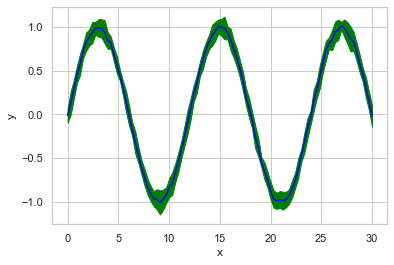

In [111]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error


x, y, error = gen_uncertain_data()
plt.plot(x, y, color='blue')
plt.fill_between(x, y-error,y+error, color='green')
plt.ylabel('y')
_ = plt.xlabel('x')

**(0.5 балла) Задача 9.** Bизуализируйте соотношение различных издательств, используя [pie plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-pie).


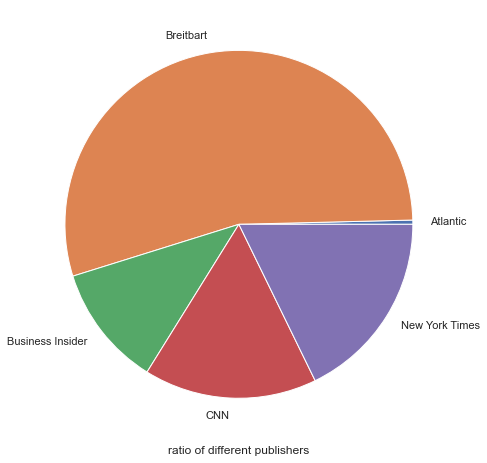

In [103]:
series = pd.Series(df.groupby('publication').count()['id'])
series.plot.pie(figsize=(8, 8));
y = plt.ylabel('')
x = plt.xlabel('ratio of different publishers')

**(0.5 балла) Задача 10.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

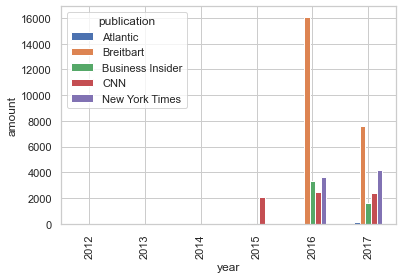

In [51]:

df.pivot_table(values='id', index='year', columns='publication', aggfunc='count').plot.bar()
x = plt.xlabel('year')
y = plt.ylabel('amount')


>Судя по графику, в 2016 году было больше всего публикаций.

**(0.5 балла) Задача 11.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

C:\Users\Katya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


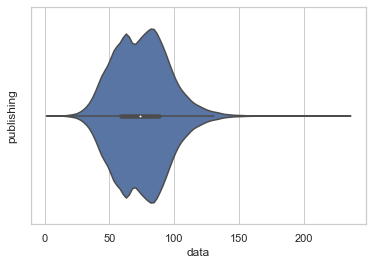

In [124]:
import seaborn as sns

x=df["title"].str.len()
sns.set_theme(style="whitegrid")
ax = sns.violinplot(x, hue=None)
y = plt.ylabel('publishing')
x = plt.xlabel('title_lenght')

